In [77]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import re
import os
import pandas as pd
from tqdm import tqdm
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import seaborn as sns
from string import punctuation
import matplotlib.pyplot as plt
import time
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


> # Loading the preprocessed train and test data

In [78]:
import pickle
df_train=pickle.load(open('../input/fake-news-case-study-preprocessed-daa/df_train.pkl','rb'))

> # Shape of train and test dataset

In [79]:
df_train.shape

(18285, 27)

In [80]:
df_train.head()

,id,title,author,text,label,num_characters_title,num_characters_text,num_word_title,num_word_text,num_sentences_title,...,Avg_sentence_length_title,Avg_sentence_length_text,Stopword_count_ratio_title,Stopword_count_ratio_text,Unique_words_count_ratio_title,Unique_words_count_ratio_text,cleaned_text,cleaned_title,Without_Stopwords_text,Without_Stopwords_title
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,81,4930,19,943,1,...,19.0,25.486486,0.105263,0.386002,0.947368,0.441145,house dem aide we did not even see comey s let...,house dem aide we did not even see comey s let...,house dem aide even see comey letter jason cha...,house dem aide even see comey letter jason cha...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,55,4160,11,822,1,...,11.0,28.344828,0.090909,0.371046,1.000000,0.486618,ever get the feeling your life circles the rou...,flynn hillary clinton big woman on campus brei...,ever get feeling life circles roundabout rathe...,flynn hillary clinton big woman campus breitbart
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,33,7692,7,1454,1,...,7.0,28.509804,0.142857,0.359697,1.000000,0.416781,why the truth might get you fired october the ...,why the truth might get you fired,truth might get fired october tension intellig...,truth might get fired
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,63,3237,10,612,1,...,10.0,22.666667,0.000000,0.352941,1.000000,0.436275,videos civilians killed in single us airstrike...,civilians killed in single us airstrike have b...,videos civilians killed single us airstrike id...,civilians killed single us airstrike identified
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,93,938,14,177,1,...,14.0,35.400000,0.285714,0.344633,0.857143,0.587571,print an iranian woman has been sentenced to s...,iranian woman jailed for fictional unpublished...,print iranian woman sentenced six years prison...,iranian woman jailed fictional unpublished sto...


> # Extracting independent features on X and Class label to Y variable

In [81]:
Y=df_train["label"]
X=df_train.drop(["id","title","text","label","cleaned_text","cleaned_title","author"], axis=1, inplace=False)

In [82]:
X.shape,Y.shape

((18285, 20), (18285,))

> # Splitting the dataset to train and test dataset

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, stratify=Y,random_state=42)

In [84]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(13713, 20) (13713,)
(4572, 20) (4572,)


> # 1. Traning Naive bayes model

> # Vectorizing our text features using tfidf vectorizer

In [85]:
vectorizer_tfidf =TfidfVectorizer(max_features=3500)
vectorizer_tfidf.fit(X_train["Without_Stopwords_title"].values)

# we use the fitted tfidfVectorizer to convert the text to vector
X_train_title_tfidf = vectorizer_tfidf.transform(X_train['Without_Stopwords_title']).toarray()
X_test_title_tfidf = vectorizer_tfidf.transform(X_test['Without_Stopwords_title']).toarray()

print("After vectorizations shape of train and test data")
print(X_train_title_tfidf.shape, y_train.shape)
print(X_test_title_tfidf.shape, y_test.shape)
print("="*100)

After vectorizations shape of train and test data
(13713, 3500) (13713,)
(4572, 3500) (4572,)


In [86]:
vectorizer_text_tfidf =TfidfVectorizer(max_features=4500)
vectorizer_text_tfidf.fit(X_train["Without_Stopwords_text"].values)

# we use the fitted countVectorizer to convert the text to vector
X_train_text_tfidf = vectorizer_text_tfidf.transform(X_train['Without_Stopwords_text'].values).toarray()
X_test_text_tfidf = vectorizer_text_tfidf.transform(X_test['Without_Stopwords_text'].values).toarray()

print("After vectorizations shape of train and test data")
print(X_train_text_tfidf.shape, y_train.shape)
print(X_test_text_tfidf.shape, y_test.shape)
print("="*100)

After vectorizations shape of train and test data
(13713, 4500) (13713,)
(4572, 4500) (4572,)


In [87]:
# stacking all the features for train and test dataset 
X_train_final_tfidf = np.hstack((X_train_title_tfidf, X_train_text_tfidf))
X_test_final_tfidf = np.hstack((X_test_title_tfidf , X_test_text_tfidf))

print("Final Data matrix")
print(X_train_final_tfidf.shape, y_train.shape)
print(X_test_final_tfidf.shape, y_test.shape)
print("="*100)

Final Data matrix
(13713, 8000) (13713,)
(4572, 8000) (4572,)


In [88]:
gnb = GaussianNB()
gnb.fit(X_train_final_tfidf,y_train)
y_pred = gnb.predict(X_test_final_tfidf)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
print("Gaussian NB accuracy on test dataset :",accuracy)
print("Gaussian NB precision on test dataseet :",precision)

Gaussian NB accuracy on test dataset : 0.8178040244969379
Gaussian NB precision on test dataseet : 0.752863436123348


> # Plotting confusion mattrix

In [89]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

[[2030  561]
 [ 272 1709]]


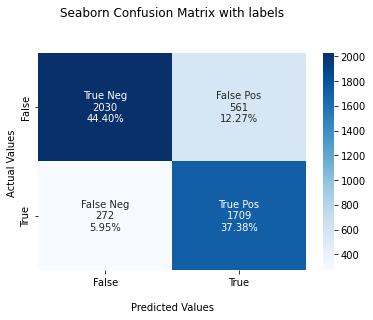

In [90]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

> # k-nearest neighbors Classifier

In [91]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
neigh.fit(X_train_final_tfidf,y_train)
y_pred = neigh.predict(X_test_final_tfidf)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
print("k-nearest neighbors accuracy on testdataset :",accuracy)
print("k-nearest neighbors precision on testdataset :",precision)

k-nearest neighbors accuracy on testdataset : 0.46566054243219596
k-nearest neighbors precision on testdataset : 0.447713897691263


> # Plotting confusion mattrix

In [92]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

[[ 151 2440]
 [   3 1978]]


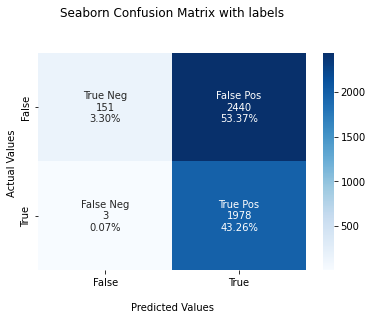

In [93]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

> # 2. Traning Logistic Regression model

In [94]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=12)
LR.fit(X_train_final_tfidf,y_train)
y_pred = LR.predict(X_test_final_tfidf)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
print("LR accuracy on testdataset :",accuracy)
print("LR precision on testdataset :",precision)

LR accuracy on testdataset : 0.9733158355205599
LR precision on testdataset : 0.9523114355231144


> # Plotting confusion mattrix

In [95]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

[[2493   98]
 [  24 1957]]


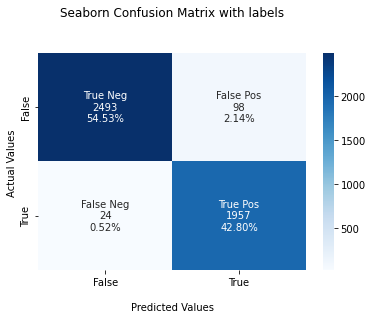

In [96]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

> # Summary of above trained models:-

In [1]:
from prettytable import PrettyTable
  
# Specify the Column Names while initializing the Table
myTable = PrettyTable([ "Vectorizer","Model", "Accuracy On test Data","Precision on Test Data"])
  
# Add rows
myTable.add_row(["tfidf Vectorizer","Gaussian NB", "81.7", "75.2"])
myTable.add_row(["-------", "-------", "-------","-------"])
myTable.add_row(["tfidf Vectorizer","KNN", "46.5", "44.7"])
myTable.add_row(["-------", "-------", "-------","-------"])
myTable.add_row(["tfidf Vectorizer","Logistic Regression", "97.3", "95.2"])
               
print(myTable)

+------------------+---------------------+-----------------------+------------------------+
|    Vectorizer    |        Model        | Accuracy On test Data | Precision on Test Data |
+------------------+---------------------+-----------------------+------------------------+
| tfidf Vectorizer |     Gaussian NB     |          81.7         |          75.2          |
|     -------      |       -------       |        -------        |        -------         |
| tfidf Vectorizer |         KNN         |          46.5         |          44.7          |
|     -------      |       -------       |        -------        |        -------         |
| tfidf Vectorizer | Logistic Regression |          97.3         |          95.2          |
+------------------+---------------------+-----------------------+------------------------+


> # Observations:-
1. After vectorizing our test features title and text using tfidf vectorizer i have trained below three first cut model
   i. Gaussian NB
   ii. KNN
   iii. Logistice regression
2. In Gaussian NB i am getting accuracy on test data is 81.7% and precesion 75.2%
3. In KNN i am getting accuracy on test data is 46.5% and precesion 44.7% clear KNN is not performing well on test so model may be having high variance
4. Logistic regression i am getting 97.3% accracy and 95.2 precesion on test data which is best out of all three models.
   which shows that our data is linearly seperable hence Logistic regression is performing well